In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
from matplotlib import pyplot as plt
from scattermap import scattermap

In [2]:
df_1 = pd.read_csv('./out/pvalues.txt', sep='\t', index_col='interacting_pair')
df_1.head()

,id_cp_interaction,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,...,TAM|5,TAM|Activated DC,TAM|Anti-inflammatory AM,TAM|CA,TAM|CD163+CD14+DCs,TAM|CD1c+ DC,TAM|Cycling AM,TAM|Plasmacytoid DC,TAM|Proinflammatory mo-Mac,TAM|TAM
interacting_pair,,,,,,,,,,,,,,,,,,,,,
KLRG2_WNT11,CPI-SS0A7B487D4,simple:A4D1S0,simple:O96014,ENSG00000188883,ENSG00000085741,True,True,False,InnateDB-All,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
KLRG2_TNFSF9,CPI-SS0FEC87269,simple:A4D1S0,simple:P41273,ENSG00000188883,ENSG00000125657,True,True,False,InnateDB-All,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PVR_TNFSF9,CPI-SS00A8596B5,simple:P15151,simple:P41273,ENSG00000073008,ENSG00000125657,True,True,False,InnateDB-All,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
KLRG2_WNT5B,CPI-SS044DF8749,simple:A4D1S0,simple:Q9H1J7,ENSG00000188883,ENSG00000111186,True,True,False,InnateDB-All,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GALR2_GAL,CPI-SS0F8ABC300,simple:O43603,simple:P22466,ENSG00000182687,ENSG00000069482,True,True,False,guidetopharmacology.org,False,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [3]:
df_1.columns.tolist()

['id_cp_interaction',
 'partner_a',
 'partner_b',
 'gene_a',
 'gene_b',
 'secreted',
 'receptor_a',
 'receptor_b',
 'annotation_strategy',
 'is_integrin',
 '0|0',
 '0|1',
 '0|2',
 '0|3',
 '0|4',
 '0|5',
 '0|Activated DC',
 '0|Anti-inflammatory AM',
 '0|CA',
 '0|CD163+CD14+DCs',
 '0|CD1c+ DC',
 '0|Cycling AM',
 '0|Plasmacytoid DC',
 '0|Proinflammatory mo-Mac',
 '0|TAM',
 '1|0',
 '1|1',
 '1|2',
 '1|3',
 '1|4',
 '1|5',
 '1|Activated DC',
 '1|Anti-inflammatory AM',
 '1|CA',
 '1|CD163+CD14+DCs',
 '1|CD1c+ DC',
 '1|Cycling AM',
 '1|Plasmacytoid DC',
 '1|Proinflammatory mo-Mac',
 '1|TAM',
 '2|0',
 '2|1',
 '2|2',
 '2|3',
 '2|4',
 '2|5',
 '2|Activated DC',
 '2|Anti-inflammatory AM',
 '2|CA',
 '2|CD163+CD14+DCs',
 '2|CD1c+ DC',
 '2|Cycling AM',
 '2|Plasmacytoid DC',
 '2|Proinflammatory mo-Mac',
 '2|TAM',
 '3|0',
 '3|1',
 '3|2',
 '3|3',
 '3|4',
 '3|5',
 '3|Activated DC',
 '3|Anti-inflammatory AM',
 '3|CA',
 '3|CD163+CD14+DCs',
 '3|CD1c+ DC',
 '3|Cycling AM',
 '3|Plasmacytoid DC',
 '3|Proinflammat

In [5]:
df_2=df_1[[
 'secreted', 'is_integrin',
 'CA|0',
 'CA|Activated DC',
 'CA|Anti-inflammatory AM',
 'CA|CA',
 'CA|CD163+CD14+DCs',
 'CA|CD1c+ DC',
 'CA|Cycling AM',
 'CA|Plasmacytoid DC',
 'CA|Proinflammatory mo-Mac',
 'CA|TAM']]
df_2.shape

(1231, 12)

In [6]:
df_3 = df_2[((df_2['secreted']==True) & (df_2['is_integrin']==False))]
df_3.shape

(838, 12)

In [7]:
df_4 = df_3[(df_3['CA|0']<0.001)|
            (df_3['CA|Activated DC']<0.001)|
            (df_3['CA|Anti-inflammatory AM']<0.001)|        
            (df_3['CA|CD163+CD14+DCs']<0.001)|  
            (df_3['CA|CD1c+ DC']<0.001)|  
            (df_3['CA|Cycling AM']<0.001)|              
            (df_3['CA|Plasmacytoid DC']<0.001)|              
            (df_3['CA|Proinflammatory mo-Mac']<0.001)|              
            (df_3['CA|TAM']<0.001)]
df_4

,secreted,is_integrin,CA|0,CA|Activated DC,CA|Anti-inflammatory AM,CA|CA,CA|CD163+CD14+DCs,CA|CD1c+ DC,CA|Cycling AM,CA|Plasmacytoid DC,CA|Proinflammatory mo-Mac,CA|TAM
interacting_pair,,,,,,,,,,,,
LGALS9_CD44,True,False,0.0,1.000,0.0,1.000,1.000,0.202,1.0,1.0,0.0,0.000
CXADR_FAM3C,True,False,1.0,1.000,0.0,0.000,1.000,1.000,0.0,1.0,1.0,0.000
EGFR_TGFB1,True,False,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000
EGFR_MIF,True,False,1.0,0.000,0.0,0.000,1.000,0.000,0.0,0.0,1.0,0.000
EGFR_GRN,True,False,1.0,1.000,0.0,1.000,0.964,1.000,0.0,1.0,1.0,0.000
TNFRSF1A_GRN,True,False,1.0,1.000,0.0,1.000,1.000,1.000,0.0,1.0,1.0,0.000
EGFR_COPA,True,False,1.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000
EGFR_HBEGF,True,False,1.0,1.000,0.0,0.964,0.000,0.000,0.0,1.0,0.0,0.000
NRP1_VEGFA,True,False,0.0,1.000,1.0,1.000,0.000,0.000,1.0,1.0,0.0,1.000


In [8]:
df_4.columns.tolist()

['secreted',
 'is_integrin',
 'CA|0',
 'CA|Activated DC',
 'CA|Anti-inflammatory AM',
 'CA|CA',
 'CA|CD163+CD14+DCs',
 'CA|CD1c+ DC',
 'CA|Cycling AM',
 'CA|Plasmacytoid DC',
 'CA|Proinflammatory mo-Mac',
 'CA|TAM']

In [9]:
df_5 = df_4[[
 'CA|0',
 'CA|Activated DC',
 'CA|Anti-inflammatory AM',
 'CA|CD163+CD14+DCs',
 'CA|CD1c+ DC',
 'CA|Cycling AM',
 'CA|Plasmacytoid DC',
 'CA|Proinflammatory mo-Mac',
 'CA|TAM']]
df_6 = df_5.sort_index(ascending=True)

In [10]:
df_6=df_6.rename(columns={'CA|0':'CA|MA'})

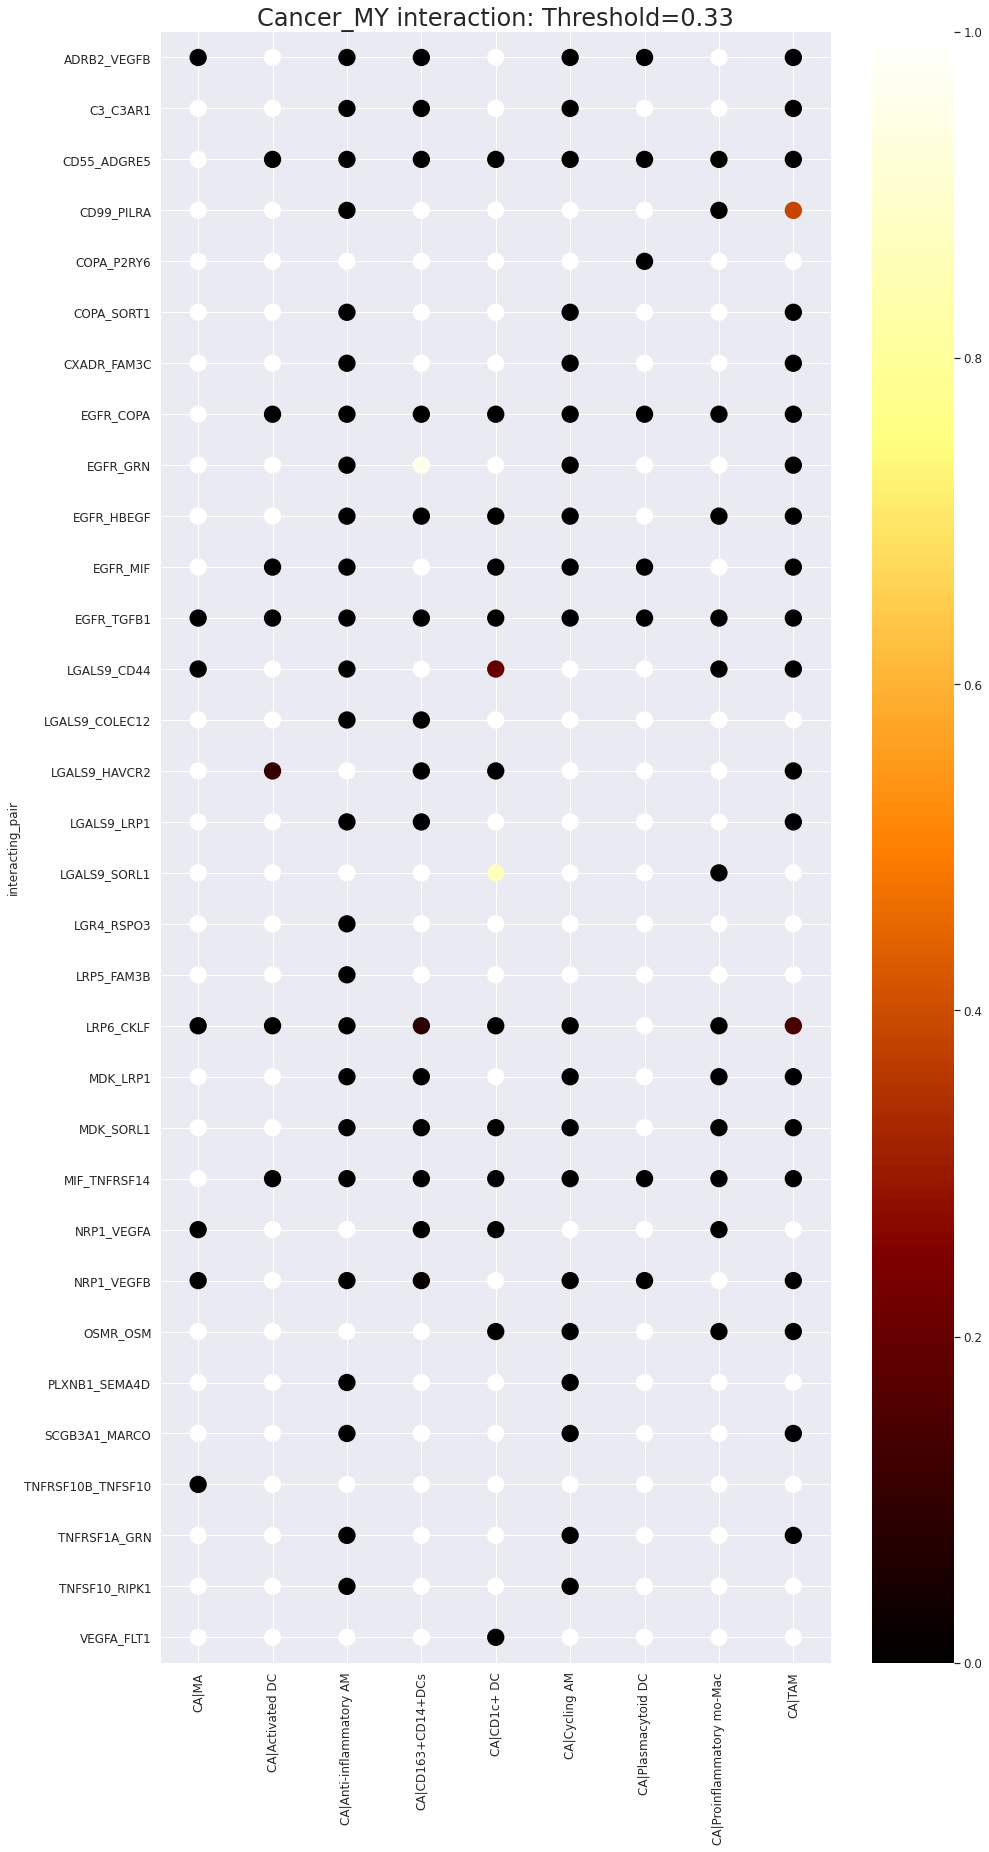

In [12]:
fig, ax = plt.subplots(figsize=(15, 30))

plt.title("Cancer_MY interaction: Threshold=0.33", size=24)
plt.rc('xtick', labelsize=12) # fontsize of the tick labels 
plt.rc('ytick', labelsize=12) # fontsize of the tick labels 
plt.rc('legend', fontsize=12)

ax=scattermap(df_6, marker_size=300, vmin=0, vmax=1, cmap='afmhot') #cmap=plt.cm.RdYlGn
plt.savefig("CA_MY.jpeg",dpi=1200)

In [ ]:
scattermap?